In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from scipy import signal
from scipy.signal import find_peaks

In [5]:
# グラフの範囲
fig_range = (0,5)

# グラフの設定
fontsize_title = 25
fontsize_label = 20

In [4]:
# csvファイルの読み込み
csv_file_path = "data.csv"
raw_data = pd.read_csv(csv_file_path)
print(raw_data)

        time         x         y         z
0       2670  0.005670  0.009546  0.051148
1       2734 -0.007716 -0.002861  0.054380
2       2799 -0.008573  0.002809  0.020888
3       2866 -0.005634  0.000942  0.013621
4       2931 -0.008921 -0.010940  0.012093
...      ...       ...       ...       ...
1392  121684 -0.032707  0.010139  0.009818
1393  121750 -0.052841  0.032304  0.017350
1394  121816 -0.055243  0.026582  0.056350
1395  121882 -0.033182  0.014888  0.038919
1396  121948 -0.070930  0.042272  0.019569

[1397 rows x 4 columns]


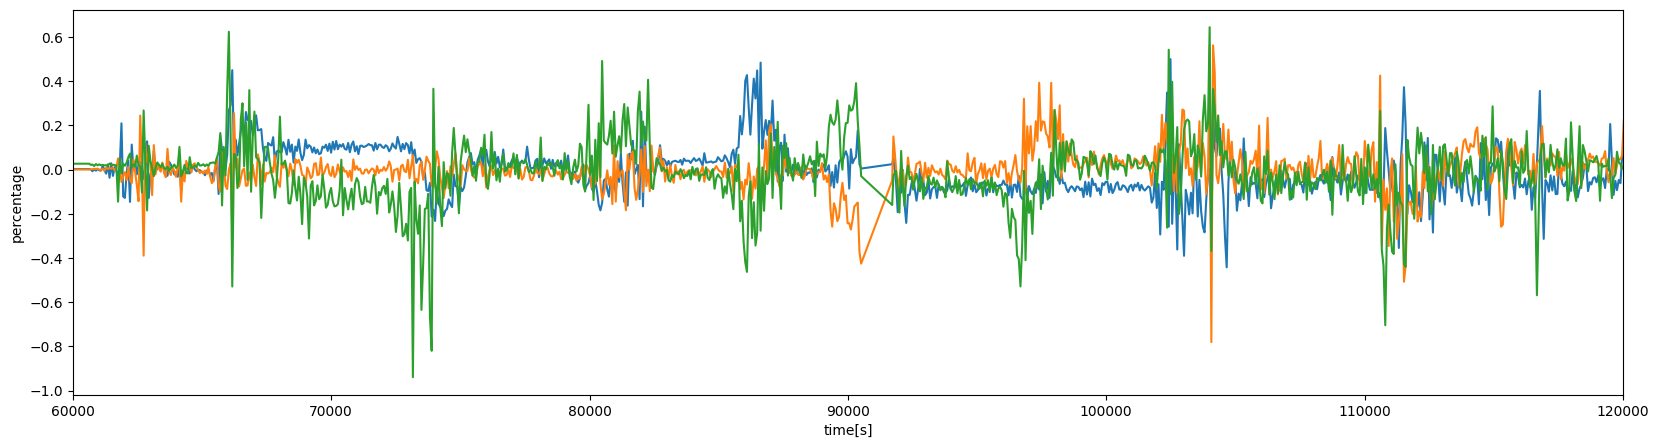

In [5]:
# 折線グラフを描画
fig = plt.figure()
plt.plot(raw_data['time'], raw_data['x'])
plt.plot(raw_data['time'], raw_data['y'])
plt.plot(raw_data['time'], raw_data['z'])
plt.xlabel('time[s]')
plt.ylabel('percentage')
fig.set_size_inches(20, 5)
plt.xlim(60000, 120000)
plt.show()

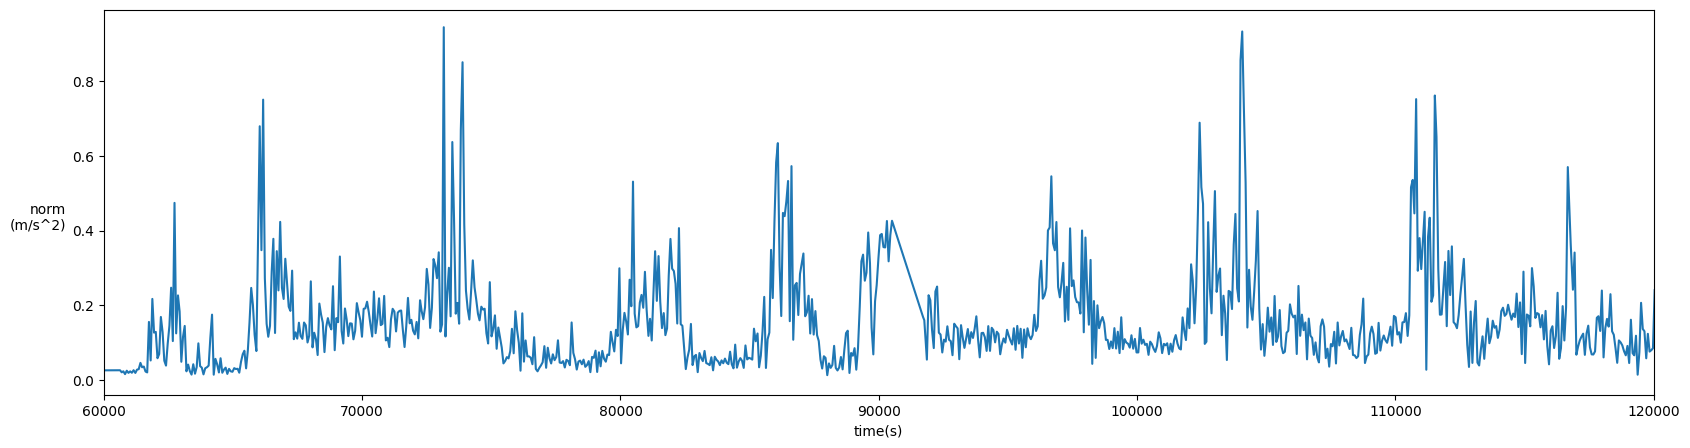

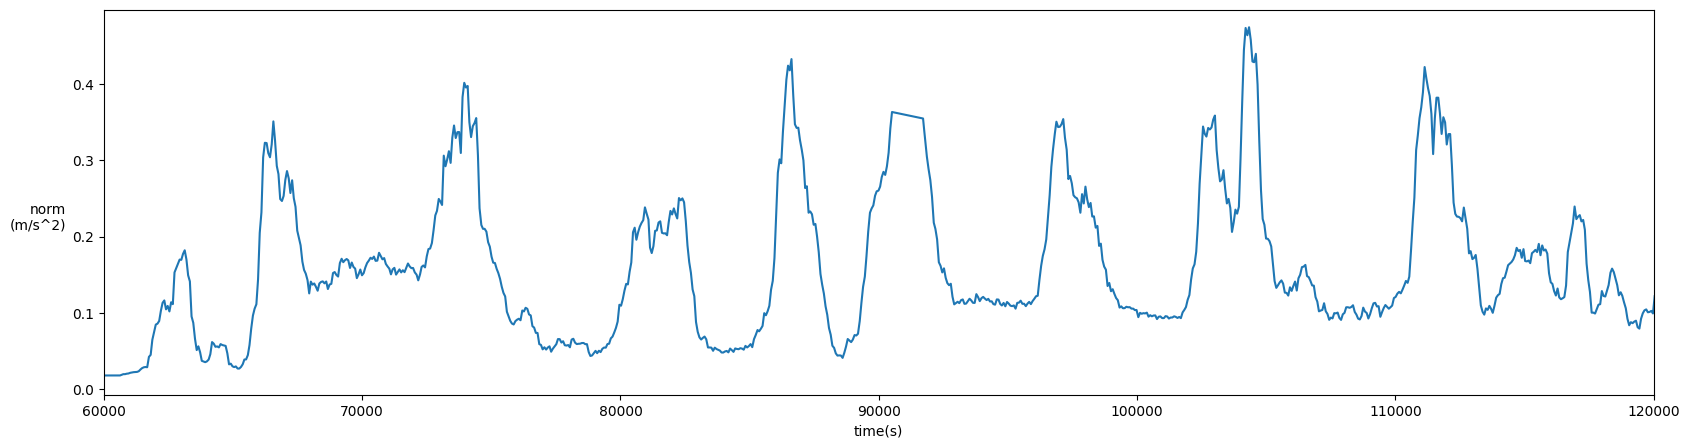

In [6]:
df = pd.read_csv(csv_file_path)
# normを計算
df['norm'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
fig = plt.figure(figsize=(20, 5))
plt.plot(df['time'], df['norm'], zorder=1)
plt.xlabel('time(s)')
plt.ylabel('norm\n(m/s^2)', rotation=0, ha='right', va='top')
plt.xlim(60000, 120000)
plt.show()
# normを計算
df['norm'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
# 移動平均を計算
df['low_norm'] = df['norm'].rolling(window=10).mean()
fig = plt.figure(figsize=(20, 5))
plt.plot(df['time'], df['low_norm'], zorder=1)
plt.xlabel('time(s)')
plt.ylabel('norm\n(m/s^2)', rotation=0, ha='right', va='top')
plt.xlim(60000, 120000)
plt.show()


In [6]:
# csvファイルの読み込み
csv_file_path_walk = "data_walk.csv"
raw_data_walk = pd.read_csv(csv_file_path_walk)
print(raw_data_walk)

        time         x         y         z
0        486 -0.007561 -0.006854  0.018983
1        549  0.007674 -0.001670  0.000724
2        616  0.006687 -0.007291  0.010674
3        683  0.012188 -0.001626  0.063130
4        749  0.002224 -0.017022 -0.003018
...      ...       ...       ...       ...
1908  126875 -0.034104  0.034198  0.008410
1909  126943 -0.007753  0.027908  0.004918
1910  127005 -0.033514  0.035353  0.007044
1911  127074 -0.010329  0.026625  0.006623
1912  127135 -0.025715  0.028761  0.008528

[1913 rows x 4 columns]


(70000.0, 110000.0)

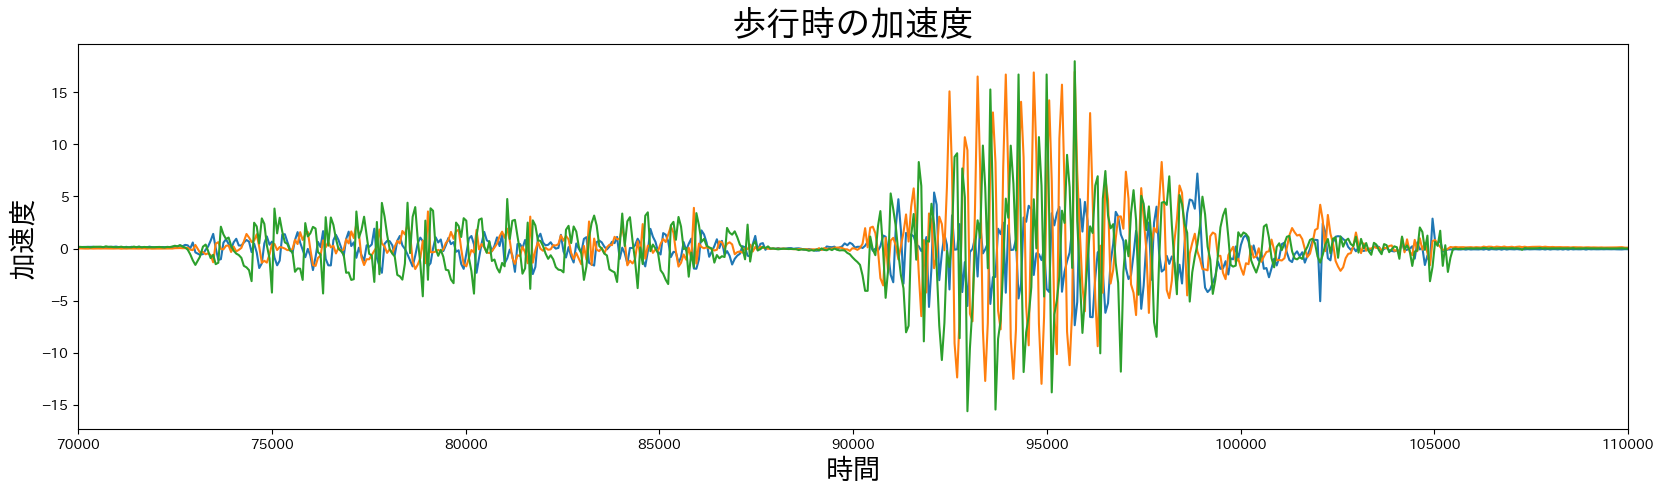

In [7]:
# 折線グラフを描画
fig = plt.figure()
plt.title('歩行時の加速度', fontsize=25)
plt.plot(raw_data_walk['time'], raw_data_walk['x'])
plt.plot(raw_data_walk['time'], raw_data_walk['y'])
plt.plot(raw_data_walk['time'], raw_data_walk['z'])
plt.xlabel('時間', fontsize=20)
plt.ylabel('加速度', fontsize=20)
fig.set_size_inches(20, 5)
plt.xlim(70000, 110000)

In [ ]:
if __name__ == '__main__':

    df = pd.read_csv(csv_file_path_walk)
    # normを計算
    df['norm'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
    fig = plt.figure(figsize=(20, 5))
    plt.plot(df['time'], df['norm'], zorder=1)
    plt.xlabel('time(s)')
    plt.ylabel('norm\n(m/s^2)')
    plt.ylim(0, 6)
    plt.xlim(70000, 90000)
    plt.show()


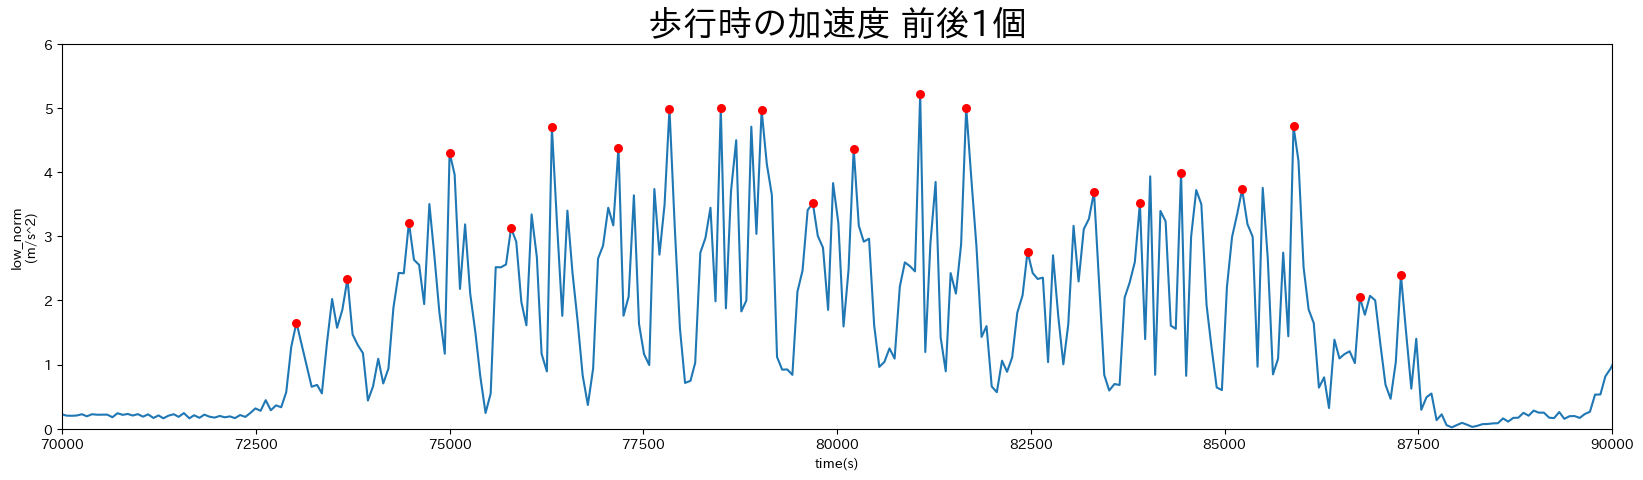

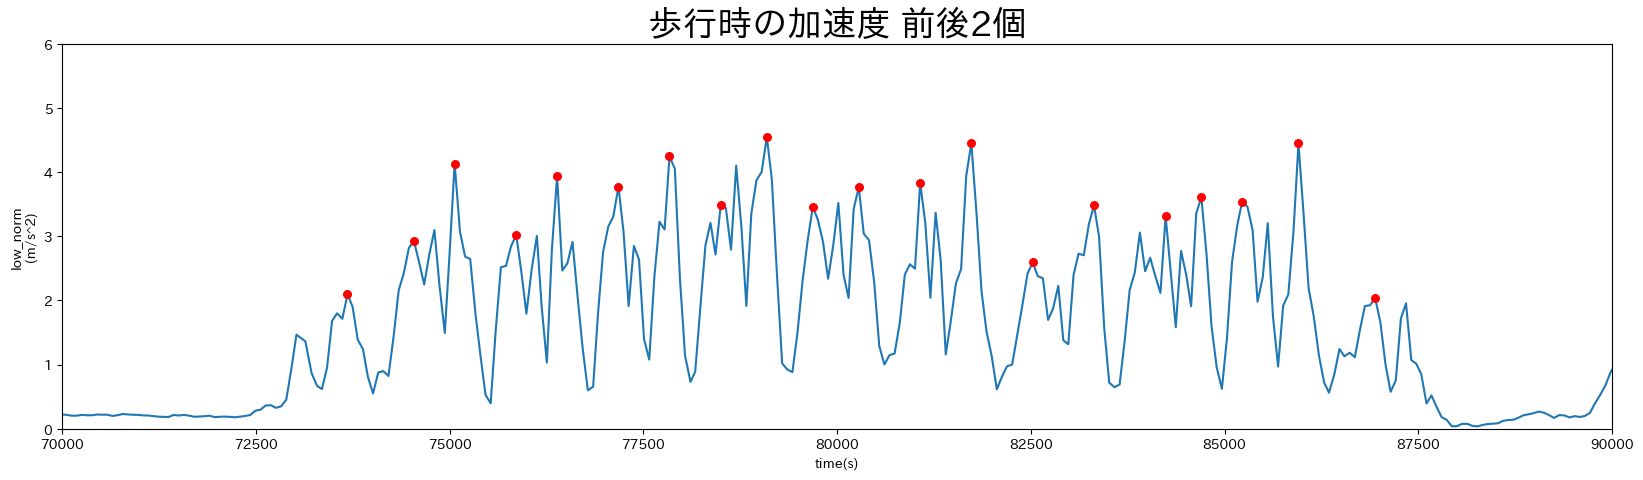

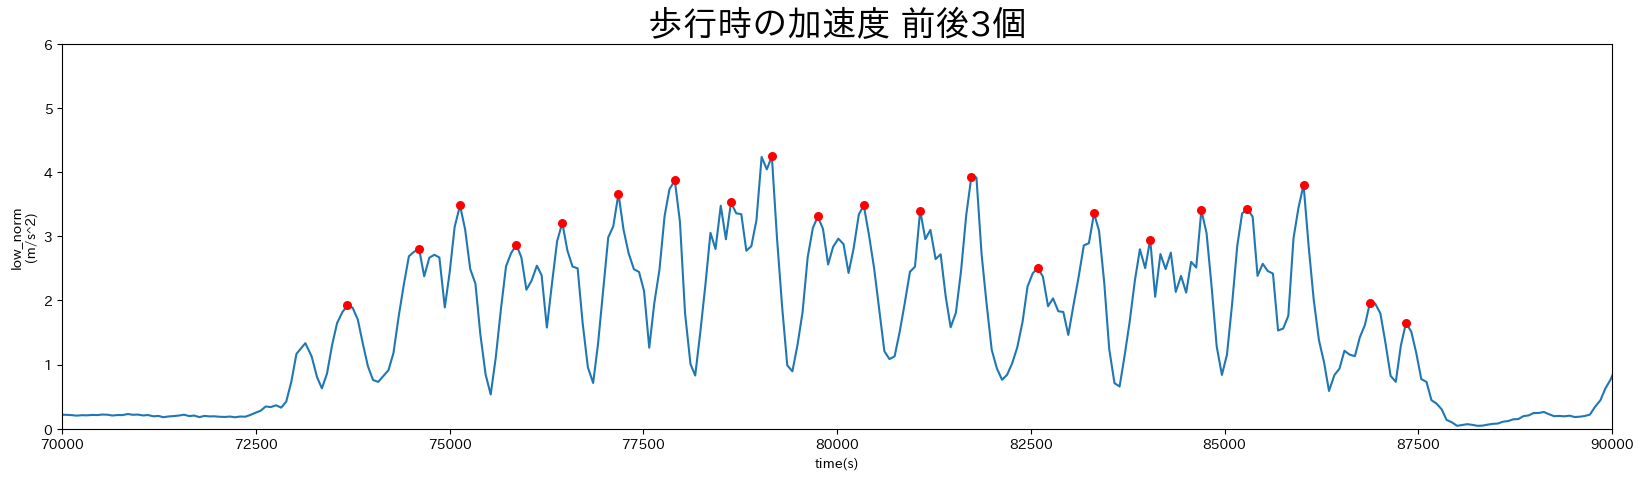

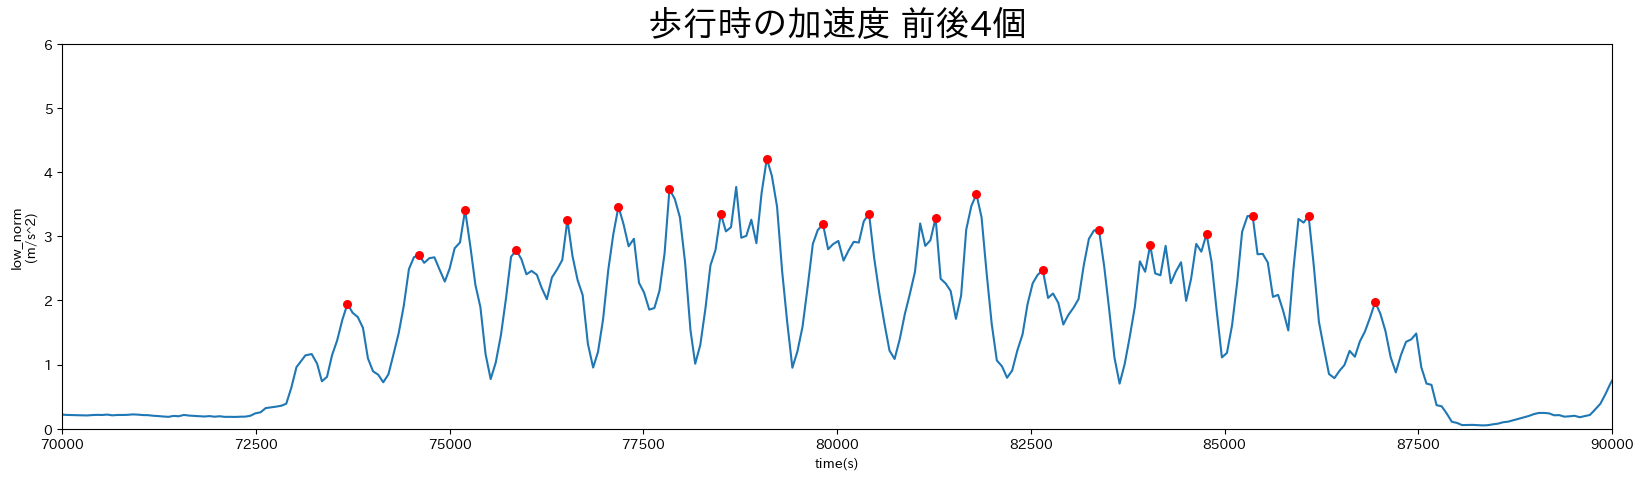

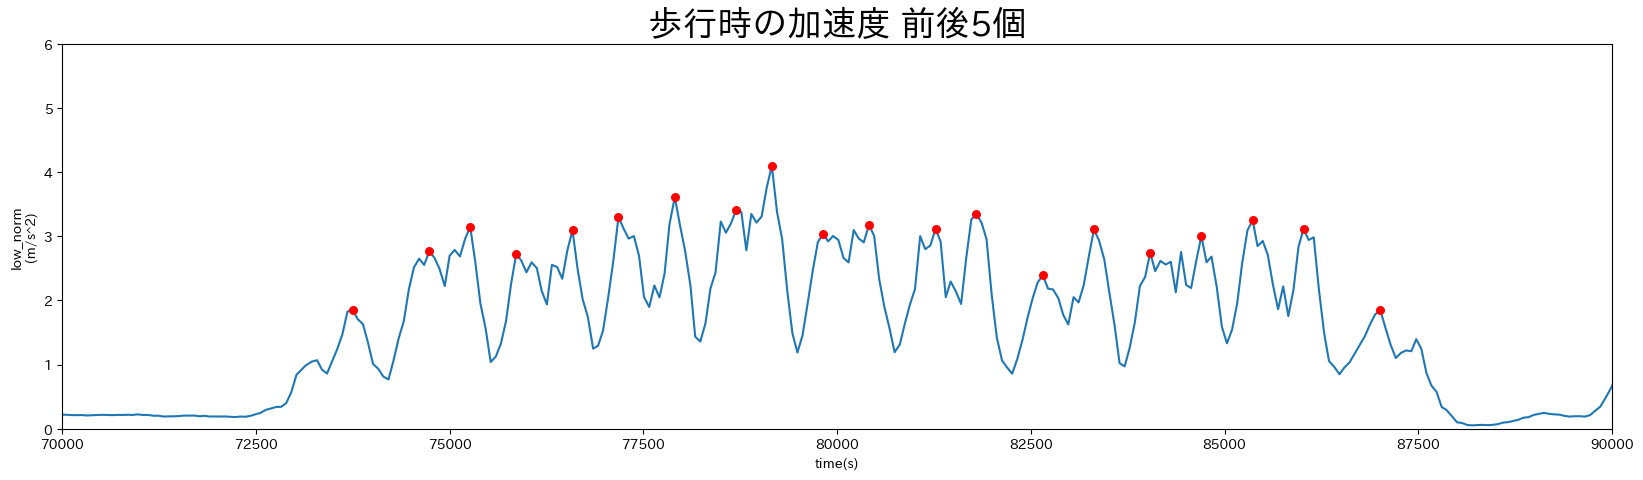

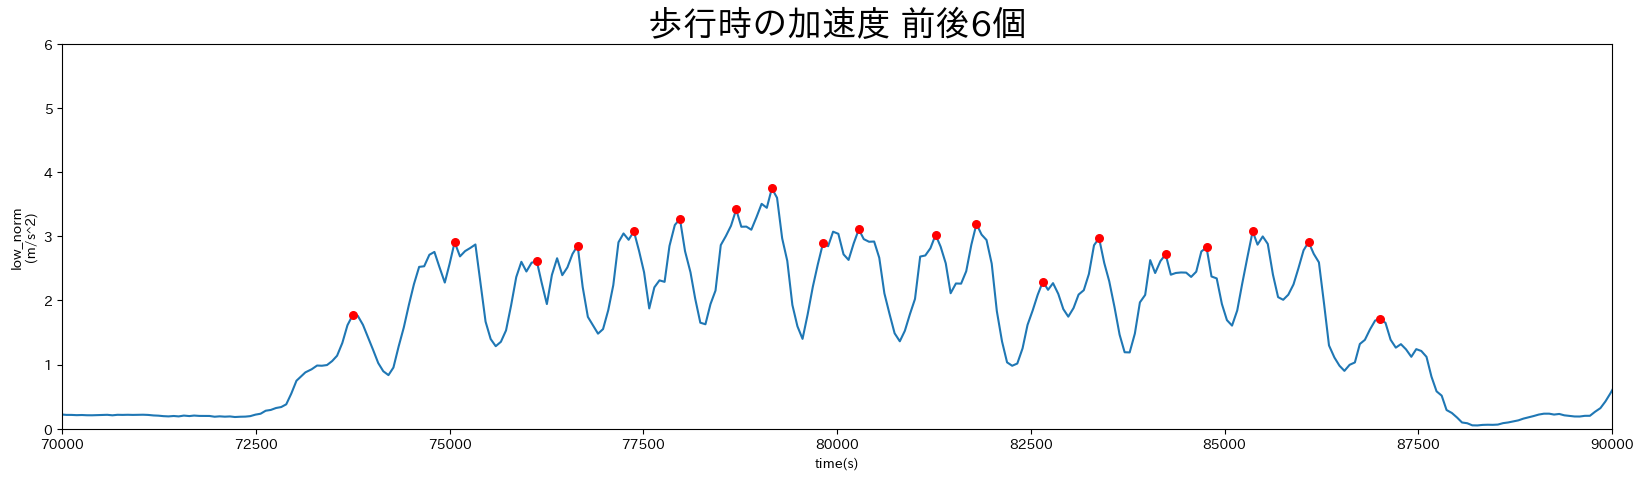

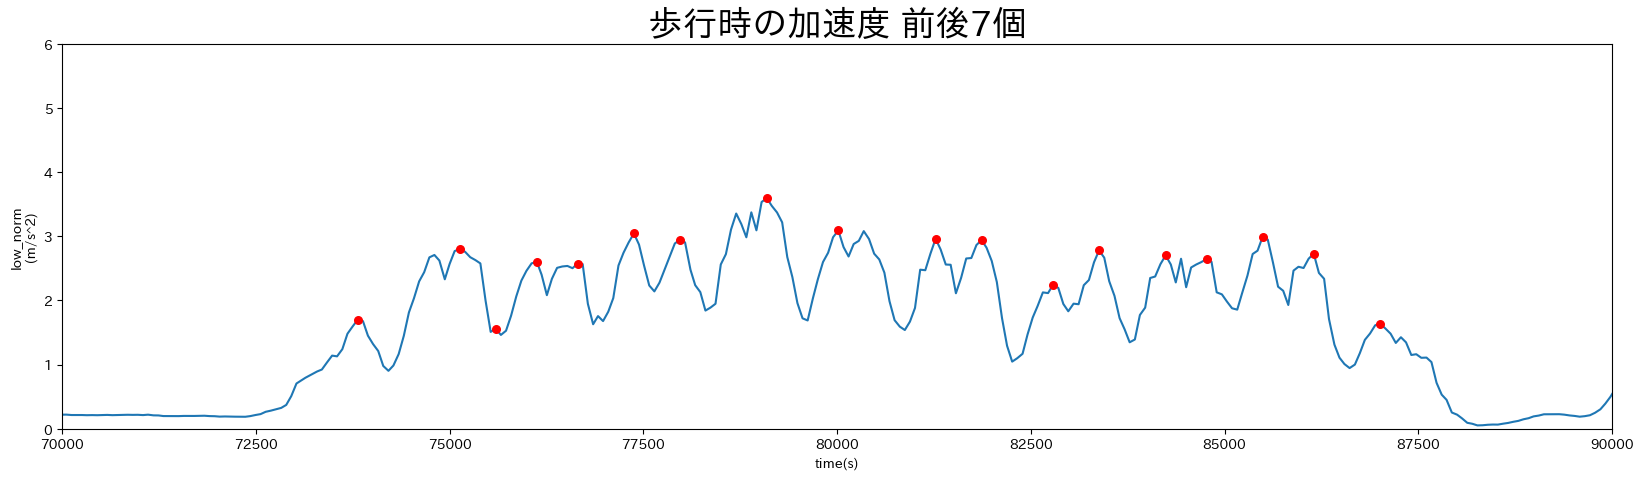

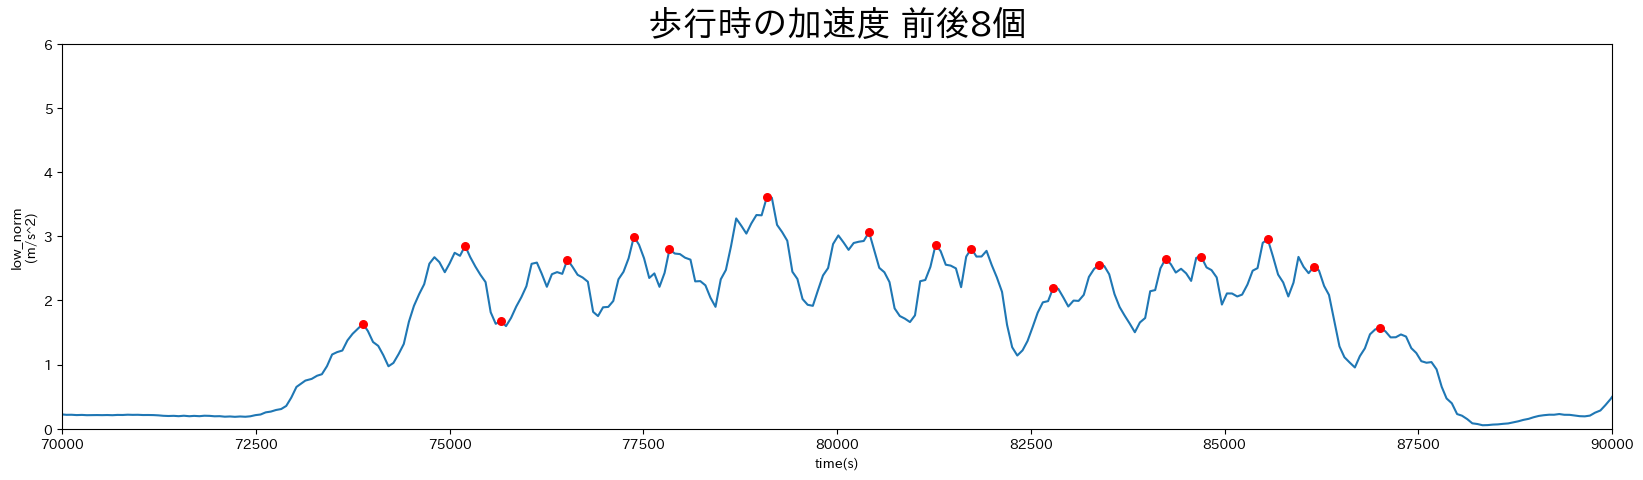

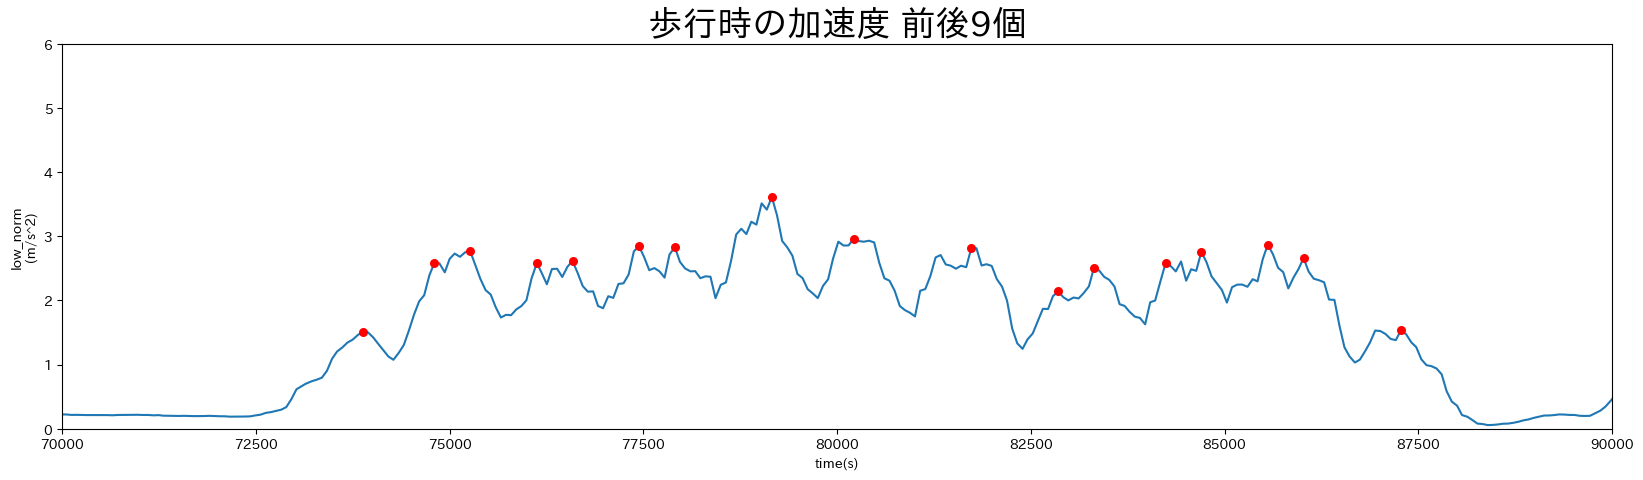

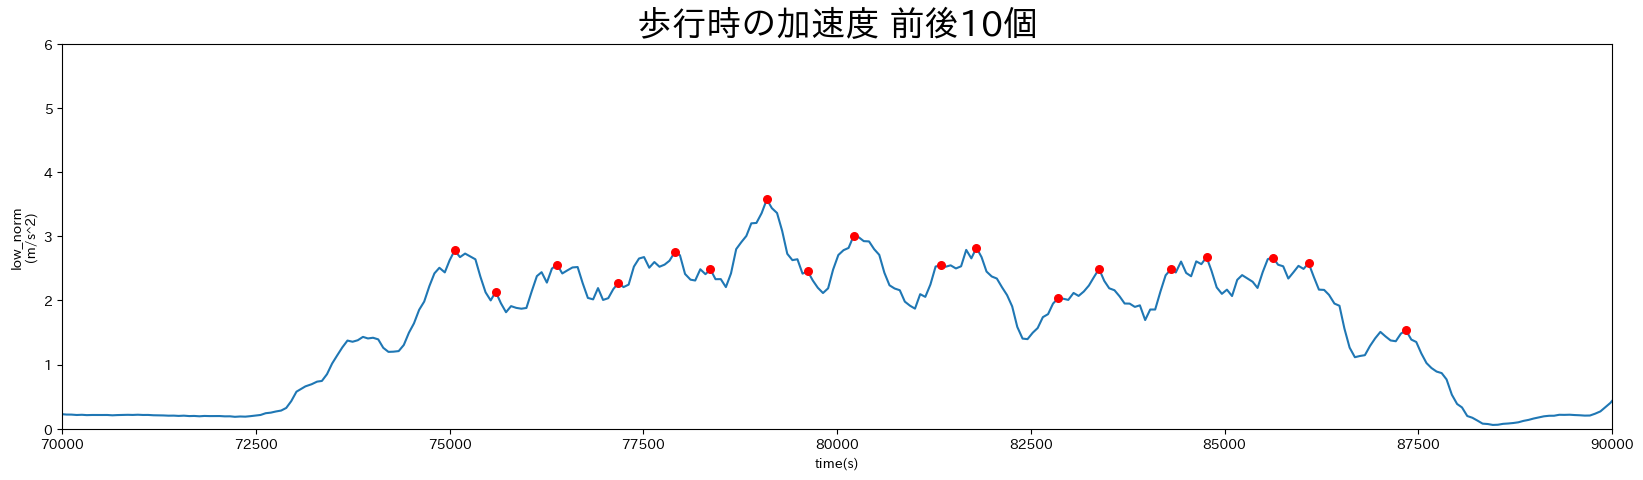

In [41]:
for i in range(10):
    df = pd.read_csv(csv_file_path_walk)
    # normを計算
    df['norm'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
    # 移動平均を計算
    df['low_norm'] = df['norm'].rolling(window=i+1).mean()
    # df['low_norm'] = df['low_norm'].rolling(window=10).mean()
    fig = plt.figure(figsize=(20, 5))
    plt.title(f'歩行時の加速度 前後{i+1}個', fontsize=25)
    plt.plot(df['time'], df['low_norm'], zorder=1)
    plt.xlabel('time(s)')
    plt.ylabel('low_norm\n(m/s^2)')
    # 赤点を描画
    peek, _ = signal.find_peaks(df['low_norm'],distance=7, height=1.5)
    plt.scatter(df['time'][peek], df['low_norm']
                [peek], s=30, color='red', zorder=2)
    plt.ylim(0, 6)
    plt.xlim(70000, 90000)
    plt.show()    

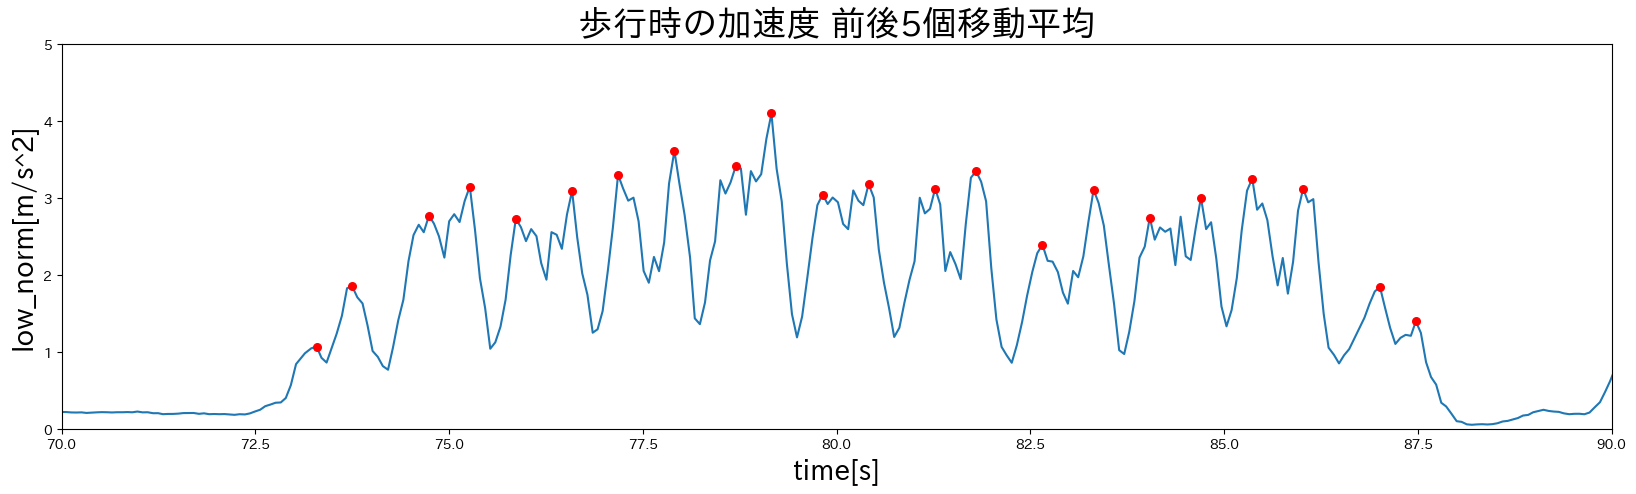

In [67]:
df = pd.read_csv(csv_file_path_walk)
# normを計算
df['norm'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
# 移動平均を計算
df['low_norm'] = df['norm'].rolling(window=5).mean()
# df['low_norm'] = df['low_norm'].rolling(window=10).mean()
fig = plt.figure(figsize=(20, 5))
plt.title('歩行時の加速度 前後5個移動平均', fontsize=25)
plt.plot(df['time']/1000, df['low_norm'], zorder=1)
plt.xlabel('time[s]', fontsize=20)
plt.ylabel('low_norm[m/s^2]', fontsize=20)
# 赤点を描画
peek, _ = signal.find_peaks(df['low_norm'],distance=5, height=1)
plt.scatter(df['time'][peek]/1000, df['low_norm']
            [peek], s=30, color='red', zorder=2)
plt.ylim(0, 5)
plt.xlim(70, 90)
plt.show()    

In [ ]:
df = pd.read_csv(csv_file_path_walk)
# normを計算
df['norm'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
# 移動平均を計算
df['low_norm'] = df['norm'].rolling(window=i+1).mean()
# df['low_norm'] = df['low_norm'].rolling(window=10).mean()
fig = plt.figure(figsize=(20, 5))
plt.title(f'歩行時の加速度 前後{i+1}個', fontsize=25)
plt.plot(df['time'] / 1000, df['low_norm'], zorder=1)  # x軸の値を1000で割る
plt.xlabel('time(s)')
plt.ylabel('low_norm\n(m/s^2)')
# 赤点を描画
peek, _ = signal.find_peaks(df['low_norm'], distance=10, height=12)
plt.scatter(df['time'][peek] / 1000, df['low_norm'][peek], s=30, color='red', zorder=2)  # x軸の値を1000で割る
plt.ylim(0, 6)
plt.xlim(70000 / 1000, 90000 / 1000)  # x軸の範囲も1000で割る
plt.show()

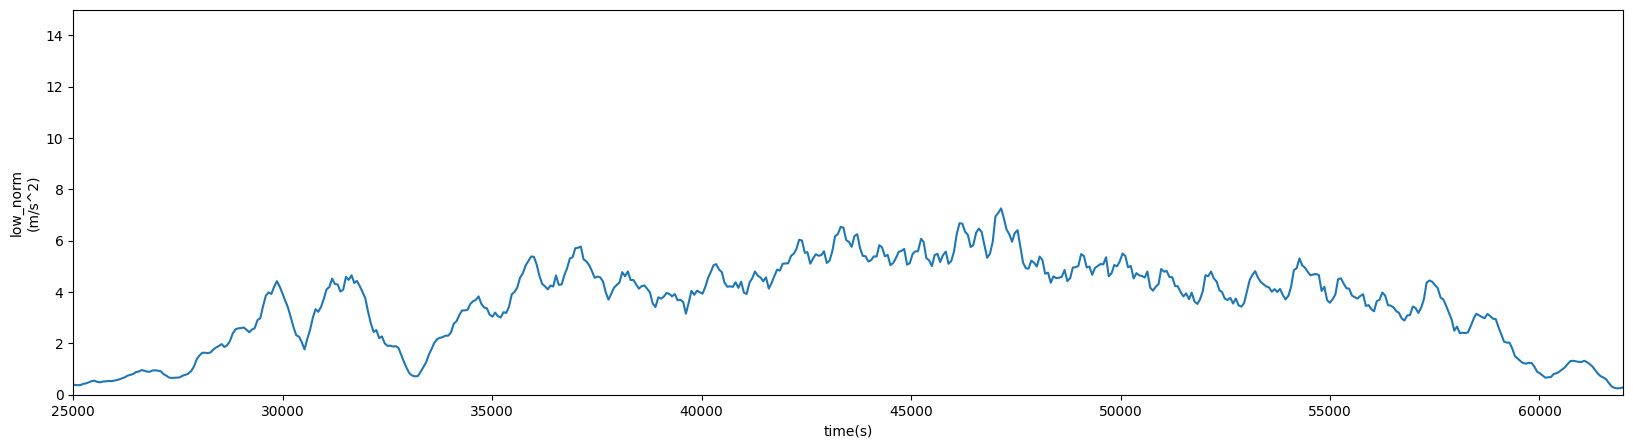

In [10]:

if __name__ == '__main__':

    df = pd.read_csv(csv_file_path_walk)
    # normを計算
    df['norm'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
    # 移動平均を計算
    df['low_norm'] = df['norm'].rolling(window=10).mean()
    fig = plt.figure(figsize=(20, 5))
    plt.plot(df['time'], df['low_norm'], zorder=1)
    plt.xlabel('time(s)')
    plt.ylabel('low_norm\n(m/s^2)')
    plt.ylim(0, 15)
    plt.xlim(25000,62000)

In [4]:
# csvファイルの読み込み
csv_file_path = "A20.csv"
raw_data_A20 = pd.read_csv(csv_file_path)
print(raw_data_A20)

       time         x         y         z
0       329  0.001604  0.000000  0.000993
1       331  0.000993  0.000000  0.000993
2       333  0.001604  0.000611  0.000993
3       390  0.000993 -0.000611  0.001604
4       446  0.001604 -0.000611  0.000993
...     ...       ...       ...       ...
1343  89716  0.001374 -0.000153 -0.000687
1344  89783  0.001374 -0.000153 -0.000076
1345  89849  0.001985 -0.000764 -0.000687
1346  89916  0.002596 -0.000153 -0.000076
1347  89980  0.002596 -0.000764 -0.000076

[1348 rows x 4 columns]


(30000.0, 60000.0)

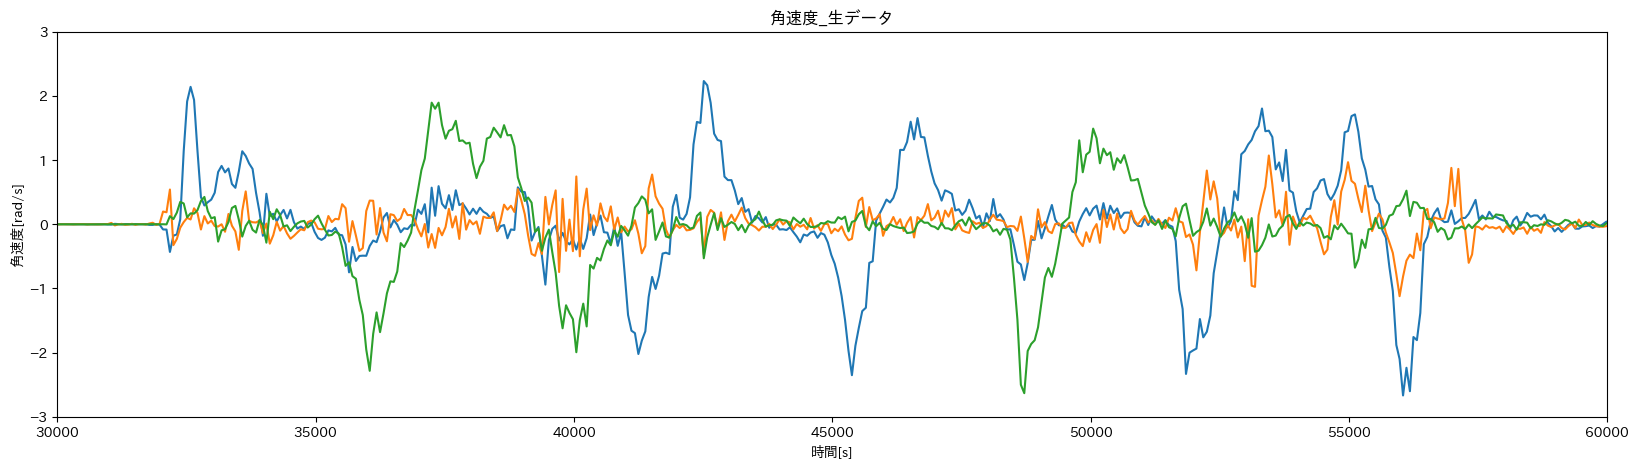

In [34]:
# 折線グラフを描画
fig = plt.figure()
plt.title('角速度_生データ')
plt.plot(raw_data_A20['time'], raw_data_A20['x'])
plt.plot(raw_data_A20['time'], raw_data_A20['y'])
plt.plot(raw_data_A20['time'], raw_data_A20['z'])
plt.xlabel('時間[s]')
plt.ylabel('角速度[rad/s]')
plt.ylim(-3, 3)
fig.set_size_inches(20, 5)
plt.xlim(30000, 60000)

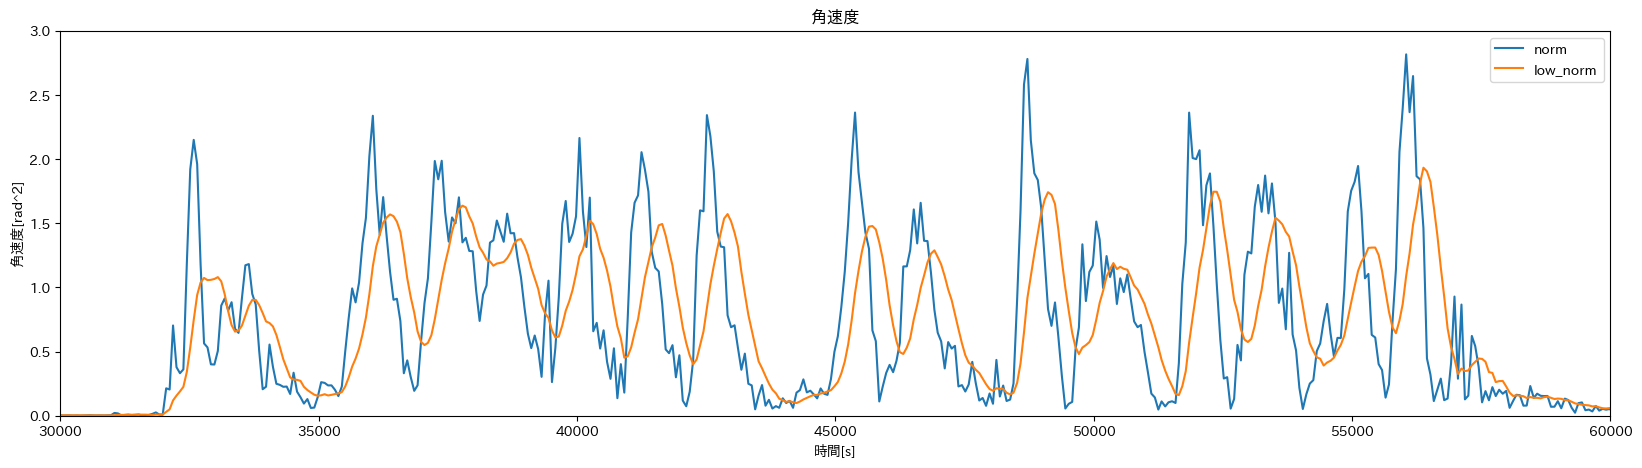

In [35]:
df = pd.read_csv(csv_file_path)
# normを計算
df['norm'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
df['low_norm'] = df['norm'].rolling(window=10).mean()
fig = plt.figure()
plt.title('角速度')
plt.plot(df['time'], df['norm'], zorder=1,label='norm')
plt.plot(df['time'], df['low_norm'], zorder=1,label='low_norm')
plt.xlabel('時間[s]')
plt.ylabel('角速度[rad^2]')
plt.ylim(0, 3)
fig.set_size_inches(20, 5)
plt.xlim(30000, 60000)
plt.legend()
plt.show()

In [11]:
# csvファイルの読み込み
csv_file_path_rad = "data_rad.csv"
raw_data_rad = pd.read_csv(csv_file_path_rad)
print(raw_data_rad)

        time         x         y         z
0         44 -0.000458  0.000153 -0.000000
1         92  0.000458  0.000611 -0.000153
2        159 -0.000153 -0.000153 -0.000000
3        225 -0.000153  0.000153 -0.000000
4        291 -0.000305 -0.000458 -0.000000
...      ...       ...       ...       ...
1392  115413  0.000153  0.000153 -0.000000
1393  115479 -0.001069  0.000153 -0.000000
1394  115546 -0.000153  0.000153  0.000000
1395  115611 -0.000764  0.000153 -0.000000
1396  115677 -0.000458  0.000153 -0.000000

[1397 rows x 4 columns]


(20000.0, 65000.0)

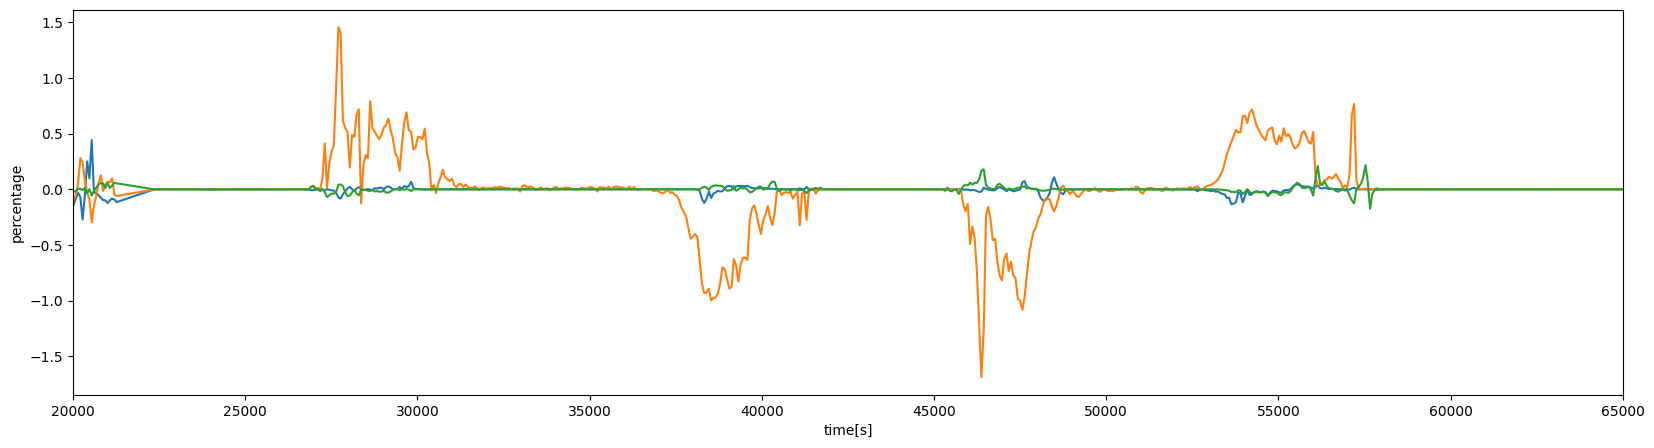

In [12]:
# 折線グラフを描画
fig = plt.figure()
plt.plot(raw_data_rad['time'], raw_data_rad['x'])
plt.plot(raw_data_rad['time'], raw_data_rad['y'])
plt.plot(raw_data_rad['time'], raw_data_rad['z'])
plt.xlabel('time[s]')
plt.ylabel('percentage')
fig.set_size_inches(20, 5)
plt.xlim(20000, 65000)

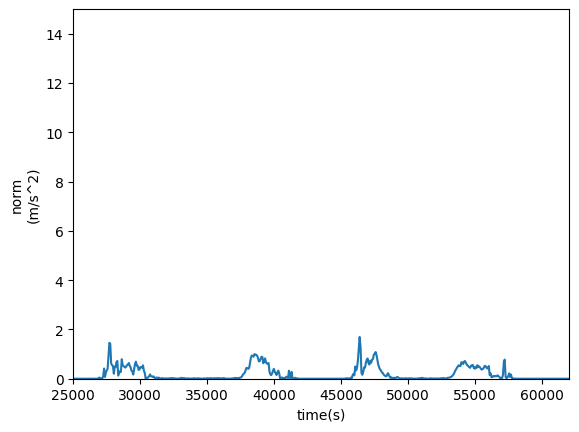

In [13]:
if __name__ == '__main__':

    df = pd.read_csv(csv_file_path_rad)
    # normを計算
    df['norm'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
    df['low_norm'] = df['norm'].rolling(window=10).mean()
    plt.plot(df['time'], df['norm'], zorder=1)
    plt.xlabel('time(s)')
    plt.ylabel('norm\n(m/s^2)')
    plt.ylim(0, 15)
    fig.set_size_inches(20, 5)
    plt.xlim(25000,62000)